## Example notebook for the ATOM pipeline
---------------------------------

Load the Australian Weather dataset from Kaggle at https://www.kaggle.com/jsphyg/weather-dataset-rattle-package.

In [1]:
# Import packages
import pandas as pd
from atom import ATOM

In [2]:
# Load the Australian weather dataset as a pandas dataframe
# Make sure to have the file 'weatherAUS.csv' in the same directory as your notebook or change the path!

X = pd.read_csv('weatherAUS.csv')
Y = X['RainTomorrow']  # Target feature
X = X.drop('RISK_MM', axis=1)  # Feature directly related to the target
X = X.drop('RainTomorrow', axis=1)

In [3]:
# Run ATOM pipeline
atom = ATOM(models=['MNB', 'LogReg', 'RF', 'lSVM'],
            metric="accuracy",
            impute='median',
            features=0.8,
            ratio=0.25,
            max_iter=10,
            init_points=3,
            n_splits=5,
            n_jobs=1,
            verbose=1)

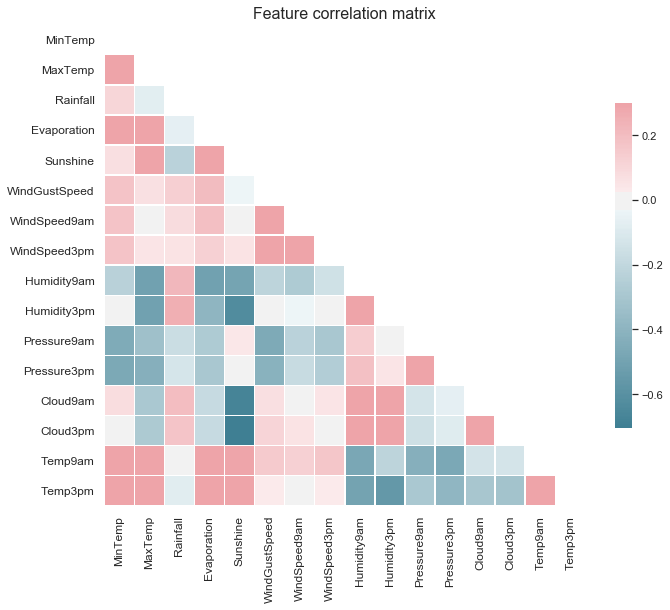

In [4]:
atom.plot_correlation(X)

In [5]:
atom.fit(X, Y, percentage=3)


<================ ATOM ================>

Algorithm set to binary classification.
Models in pipeline: ['MNB', 'LogReg', 'RF', 'lSVM']


Running pipeline =====================>


100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:35<00:00,  8.13s/it]




Final stats ================>>
Total duration: 00h:00m:35s
Target metric: Accuracy
------------------------------------
Logistic Regression           --> 0.836 ± 0.011
Random Forest                 --> 0.841 ± 0.006 !!
Linear Support Vector Machine --> 0.836 ± 0.012


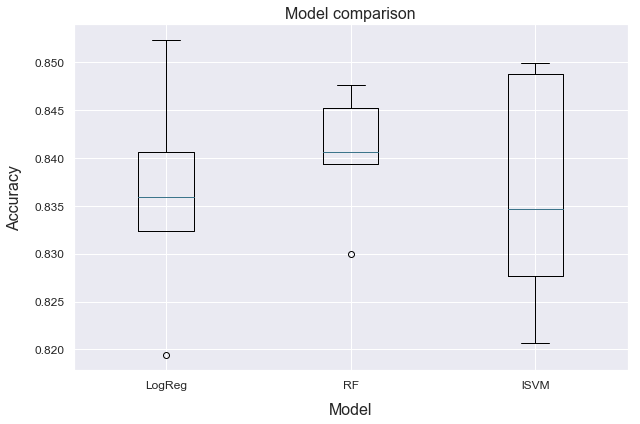

In [6]:
atom.boxplot()

In [7]:
atom.LogReg.best_params

{'max_iter': 500, 'C': 3.7, 'penalty': 'l1'}

In [8]:
atom.MNB.error

'ValueError: Input X must be non-negative'

In [9]:
atom.RF.best_model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=0.7, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=81,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [10]:
atom.LogReg.Precision()

0.6981132075471698

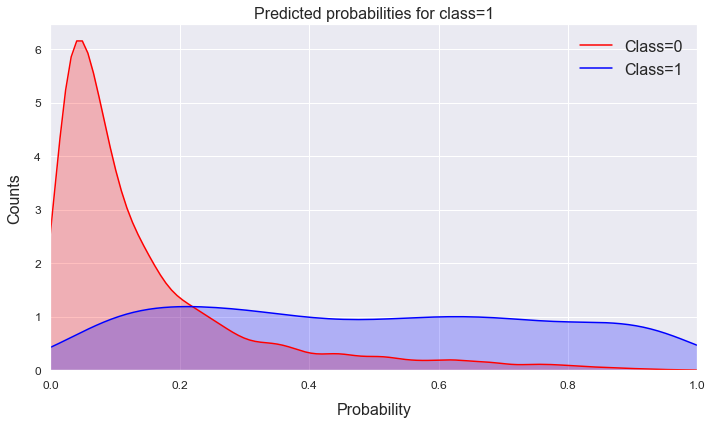

In [11]:
atom.lSVM.plot_probabilities()

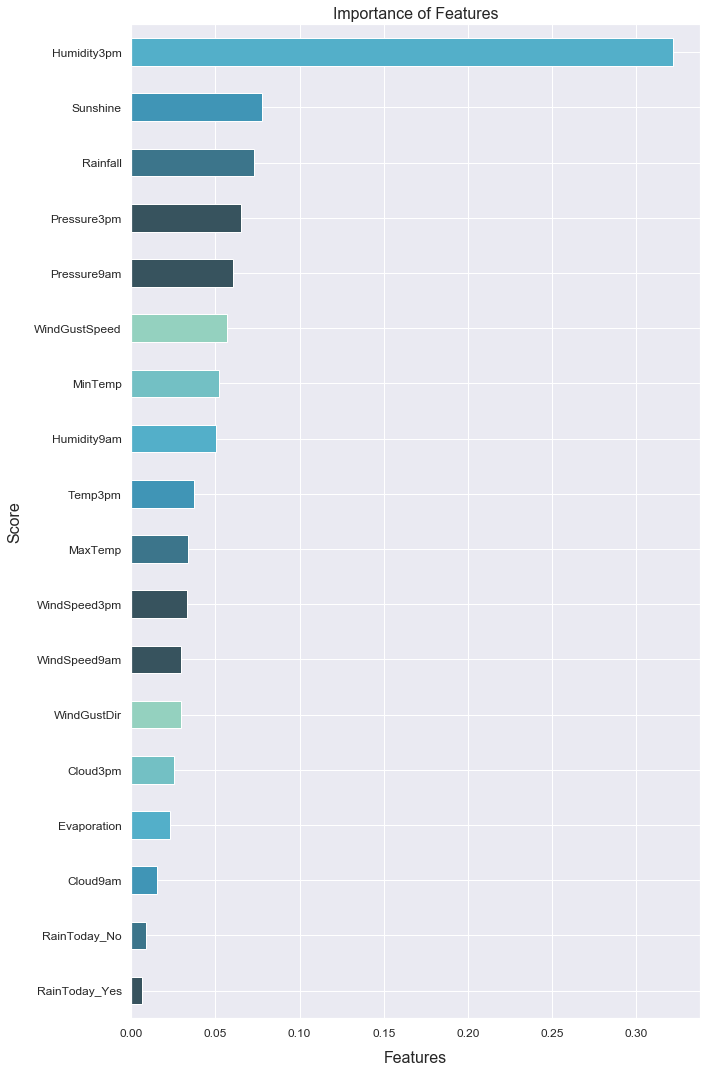

In [12]:
atom.RF.plot_feature_importance()

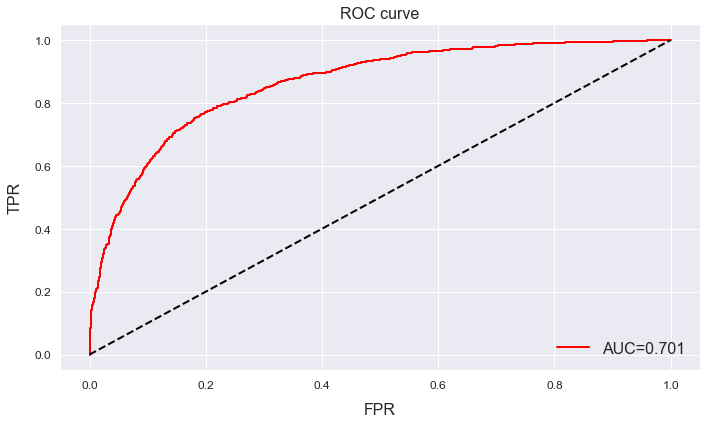

In [13]:
atom.LogReg.plot_ROC()

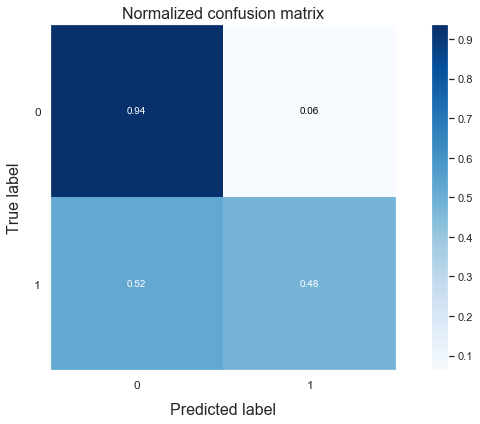

In [14]:
atom.RF.plot_confusion_matrix()

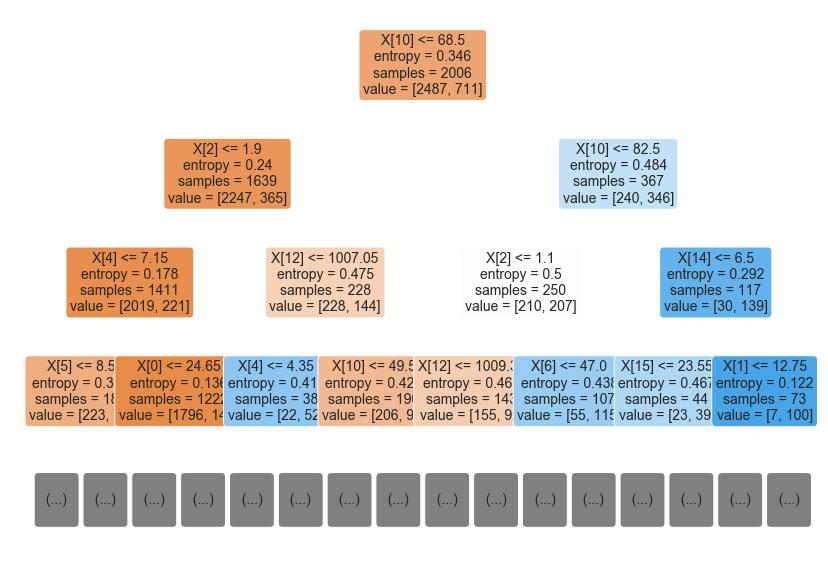

In [20]:
atom.RF.plot_decision_tree(0, max_depth=3, rotate=False)